# [goulib](../polynomial.ipynb).polynomial
polynomial and piecewise defined functions

In [1]:
from goulib.notebook import *
from goulib.polynomial import *
from goulib import itertools2, plot

## Polynomial

a Polynomial is an Expr defined by factors and with some more methods

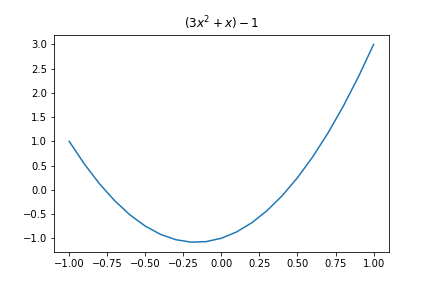

In [2]:
p1=Polynomial([-1,1,3]) # inited from coefficients in ascending power order
p1 # Latex output by default

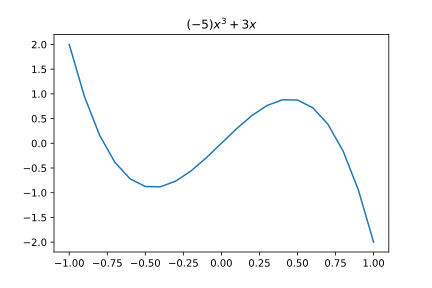

In [3]:
p2=Polynomial('- 5x^3 +3*x') # inited from string, in any power order, with optional spaces and *
p2.plot()

In [4]:
[(x,p1(x)) for x in itertools2.linspace(-1,1,11)] #evaluation

[(-1, 1),
 (-0.8, 0.12000000000000033),
 (-0.6000000000000001, -0.5199999999999998),
 (-0.4000000000000001, -0.9199999999999999),
 (-0.20000000000000007, -1.08),
 (-5.551115123125783e-17, -1.0),
 (0.19999999999999996, -0.6800000000000002),
 (0.39999999999999997, -0.1200000000000001),
 (0.6, 0.6800000000000002),
 (0.8, 1.7200000000000006),
 (1.0, 3.0)]

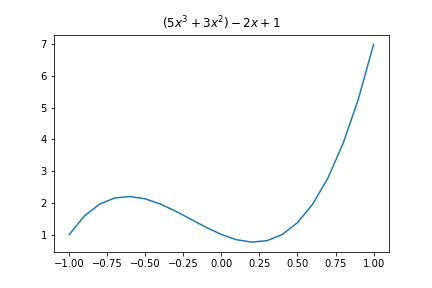

In [5]:
p1-p2+2 # addition and subtraction of polynomials and scalars

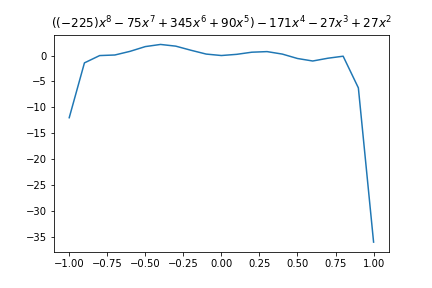

In [6]:
-3*p1*p2**2 # polynomial (and scalar) multiplication and scalar power

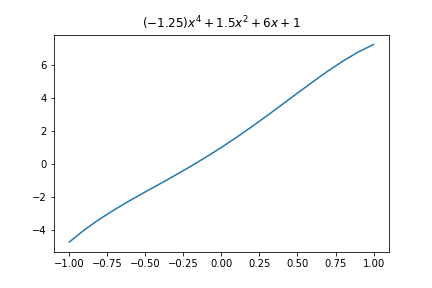

In [7]:
p1.derivative()+p2.integral() #integral and derivative

## Motion
"motion laws" are functions of time which return (position, velocity, acceleration, jerk) tuples

In [8]:
from goulib.motion import *

### Polynomial Segments

Polynomials are very handy to define Segments as coefficients can easily be determined from start/end conditions.
Also, polynomials can easily be integrated or derivated in order to obtain position, velocity, or acceleration laws from each other.

Motion defines several handy functions that return SegmentPoly matching common situations

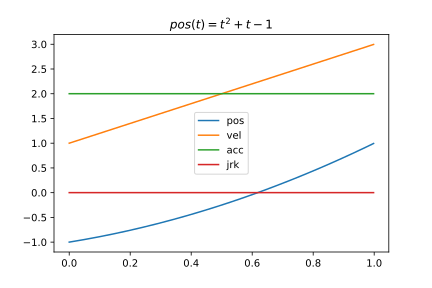

In [9]:
seg=Segment2ndDegree(0,1,(-1,1,2)) # time interval and initial position,velocity and constant acceleration
seg.plot()

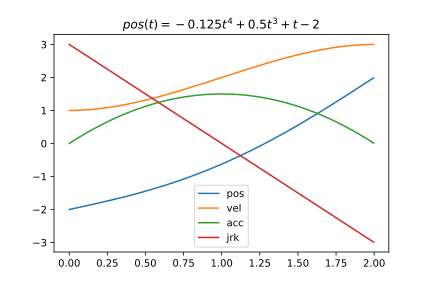

In [10]:
seg=Segment4thDegree(0,0,(-2,1),(2,3)) #start time and initial and final (position,velocity)
seg.plot()

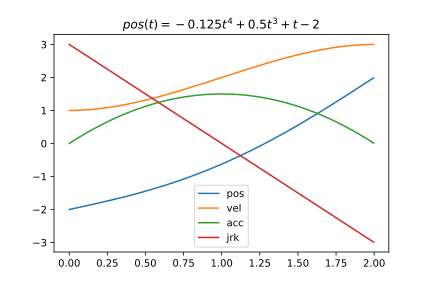

In [11]:
seg=Segment4thDegree(0,2,(-2,1),(None,3)) # start and final time, initial (pos,vel) and final vel
seg.plot()

## Interval
operations on [a..b[ intervals

In [12]:
from goulib.interval import *

Interval(5,6)+Interval(2,3)+Interval(3,4)

Intervals([[2,4), [5,6)], key=<function identity at 0x000001B8494E03A0>)

## Piecewise
Piecewise defined functions

In [13]:
from goulib.piecewise import *

The simplest are piecewise continuous functions. They are defined by $(x_i,y_i)$ tuples given in any order. 

$f(x) = \begin{cases}y_0 & x < x_1 \\ y_i & x_i \le x < x_{i+1} \\ y_n & x > x_n \end{cases}$

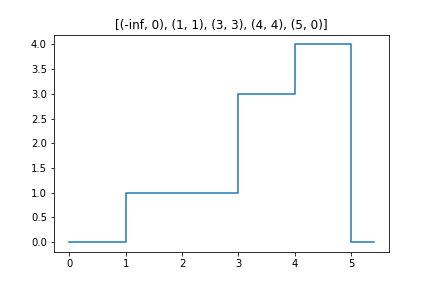

In [14]:
p1=Piecewise([(4,4),(3,3),(1,1),(5,0)])
p1 # default rendering is LaTeX

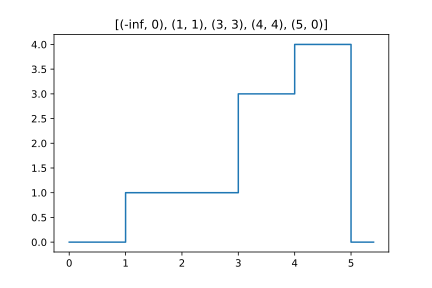

In [15]:
p1.plot() #pity that matplotlib doesn't accept large LaTeX as title...

By default y0=0 , but it can be specified at construction.

Piecewise functions can also be defined by adding (x0,y,x1) segments

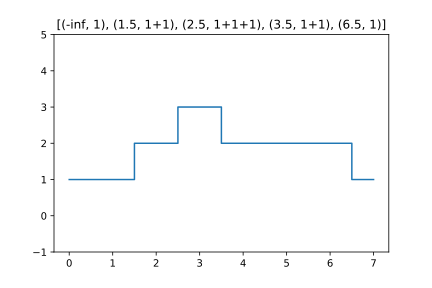

In [16]:
p2=Piecewise(default=1)
p2+=(2.5,1,6.5)
p2+=(1.5,1,3.5)
p2.plot(xmax=7,ylim=(-1,5))

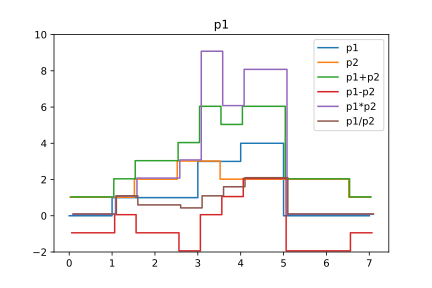

In [17]:
plot.plot([p1,p2,p1+p2,p1-p2,p1*p2,p1/p2],
     labels=['p1','p2','p1+p2','p1-p2','p1*p2','p1/p2'],
     xmax=7, ylim=(-2,10), offset=0.02)

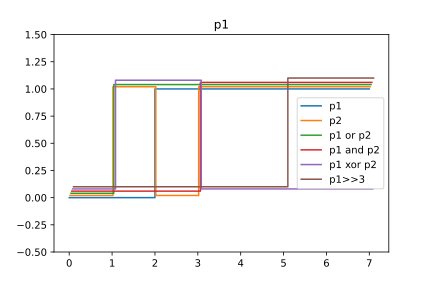

In [18]:
p1=Piecewise([(2,True)],False)
p2=Piecewise([(1,True),(2,False),(3,True)],False)
plot.plot([p1,p2,p1|p2,p1&p2,p1^p2,p1>>3],
     labels=['p1','p2','p1 or p2','p1 and p2','p1 xor p2','p1>>3'],
     xmax=7,ylim=(-.5,1.5), offset=0.02)

## Piecewise Expr function

In [ ]:
# this crashes the kernel in 3.8, but runs ok in test_goulib_piecewise ...
# todo: find why ...

from math import cos

f=Piecewise().append(0,cos).append(1,lambda x:x**x)
f

In [ ]:
f.plot()